# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='projects23in'
os.environ['KAGGLE_KEY']='0a9d08b898a35f8650c8f4d9e8a58da3'

In [ ]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 46.6MB/s]


In [ ]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [ ]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df.shape

(569, 33)

In [ ]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [ ]:
# count of rows and columns
df.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

<ipython-input-14-e6460db87cb5>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)


In [ ]:
#display df
df.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#print data
X_train

array([[ 1.65627048,  0.11668402,  1.55540908, ...,  0.42511648,
         0.3040112 , -1.42020436],
       [-0.83371132, -0.58874742, -0.86593006, ..., -1.10467824,
        -0.84952767, -0.74865299],
       [-0.74271531, -0.2313907 , -0.74132874, ..., -0.8850869 ,
        -1.14992842, -0.42455645],
       ...,
       [-1.97777937, -1.32898632, -1.93143111, ..., -1.71084029,
         0.09287239,  0.59386581],
       [-0.5414211 , -1.36147329, -0.52207834, ..., -0.48367692,
         1.01467354,  0.51152777],
       [ 2.083676  , -0.44255603,  1.94678503, ...,  1.01718871,
        -0.63152256, -1.09260408]])

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

# Performance Evaluation

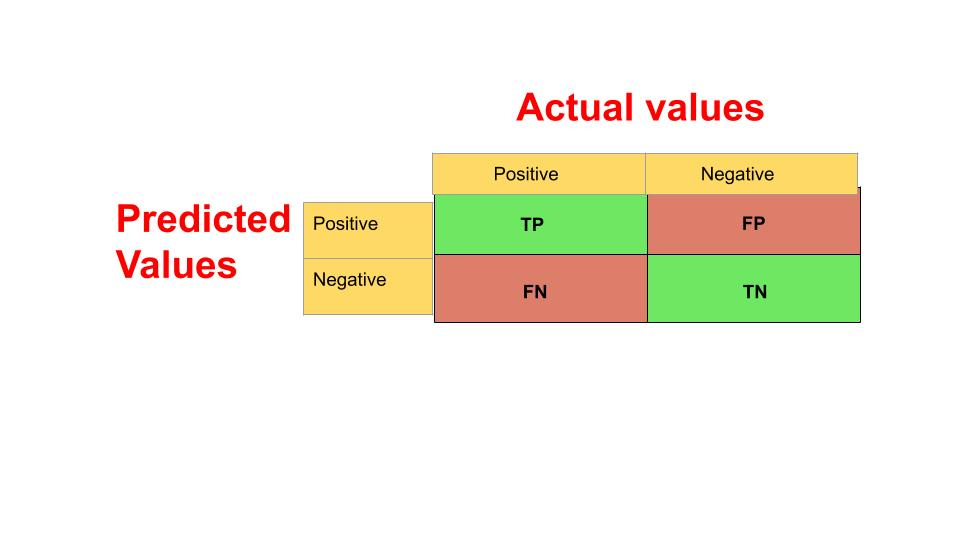

[[85  0]
 [ 2 56]]


<Axes: >

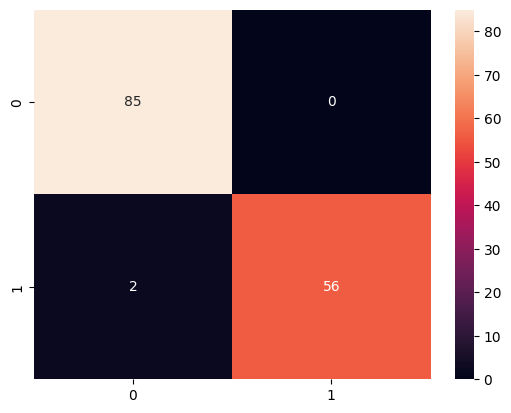

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.986013986013986


In [ ]:
print(Y_test)

[1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1]


In [ ]:
print(predictions)

[1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1]
